In [1]:
#for loading the dataset and preprocessing
import pandas as pd
import spacy
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('stopwords')
#for visualisation
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#for vectorizing the text
from sklearn.feature_extraction.text import TfidfVectorizer
#for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#for evaluvation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#loading the dataset
data=pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
#dropping the unwanted columns
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='v1', ylabel='count'>

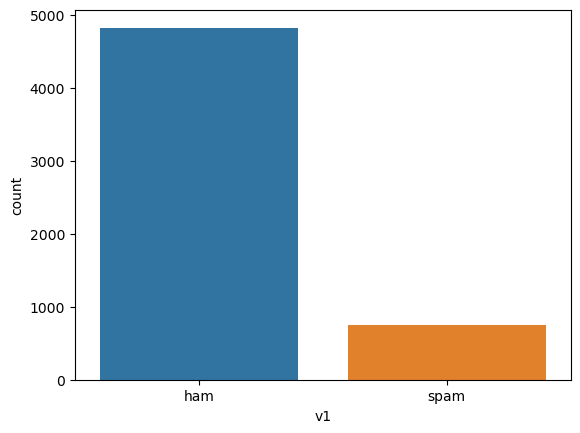

In [7]:
#visualising the number of spam and ham text
sns.countplot(x="v1",data=data)

In [8]:
#downsampling as the number of ham is greater than spam
ham=data[data.v1=="ham"]
spam=data[data.v1=="spam"]
ham=ham.sample(n=len(spam),random_state=1)
#creating new dataset
df=pd.concat([ham,spam],axis=0).reset_index(drop=True)

<Axes: xlabel='v1', ylabel='count'>

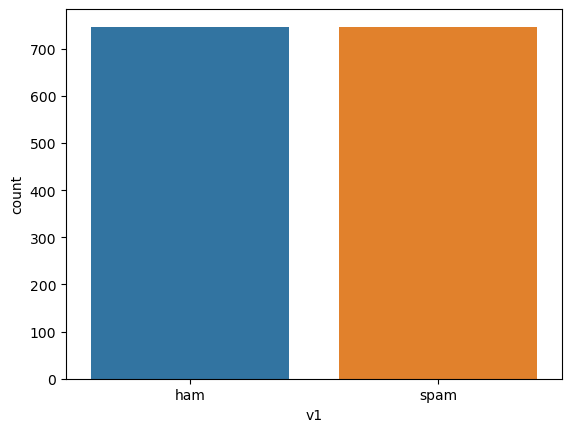

In [9]:
#visualising the count after downsampling
sns.countplot(x="v1",data=df)

In [10]:
#defining a function to preprocess the data by removing stopwords and punctuations 
def preprocessing(df):
    stop_words=set(stopwords.words('english'))
    for i in range(len(df)):
        words=nltk.word_tokenize(df["v2"][i])
        cleaned_words=[word for word in words if word.isalnum() if word not in stop_words]
        df.at[i, "v2"] = ' '.join(cleaned_words)
        
preprocessing(df)    

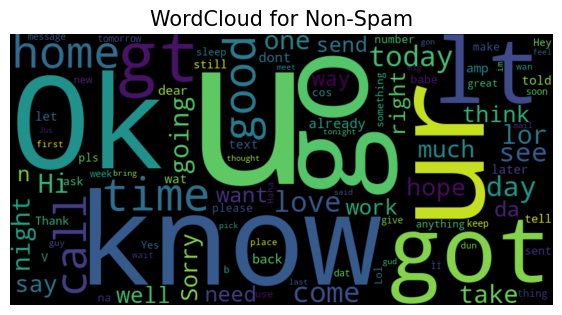

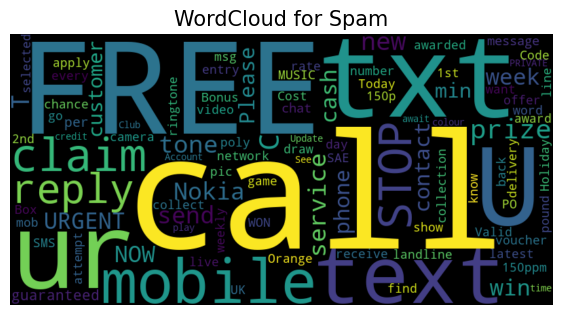

In [11]:
#visualising the most frequent words in spam and ham text
def wordclouds(df,type):
    text=" ".join(df["v2"])
    plt.figure(figsize=(7,7))
    wc = WordCloud(background_color='black',max_words=100,width=800,height=400,collocations=False).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {type}', fontsize=15)
    plt.axis('off')
    plt.show()
wordclouds(df[df['v1']=="ham"], type='Non-Spam')
wordclouds(df[df['v1']=="spam"], type='Spam')

In [12]:
#converting categorical values in v1
Spam=pd.get_dummies(df['v1'],drop_first=True)
#here '0' represents ham and '1' represenrs spam
df=pd.concat([df,Spam],axis=1)
df.drop("v1",axis=1,inplace=True)
df.head()

,v2,spam
0,Can pls pls send mail know relatives coming de...,0
1,Yeah probably sure Ilol let u know personally ...,0
2,Were gon na go get tacos,0
3,Hi Hope good day Have better night,0
4,How much r willing pay,0


In [13]:
#splittin the data and vectorizing the text using tf-idf
x_train,x_test,y_train,y_test=train_test_split(df['v2'],df['spam'],test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(max_features=1000,stop_words='english')
x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [14]:
#training machine learning model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_tfidf,y_train)
y_pred = classifier.predict(x_test_tfidf)

accuracy:  0.92
Confusion Matrix


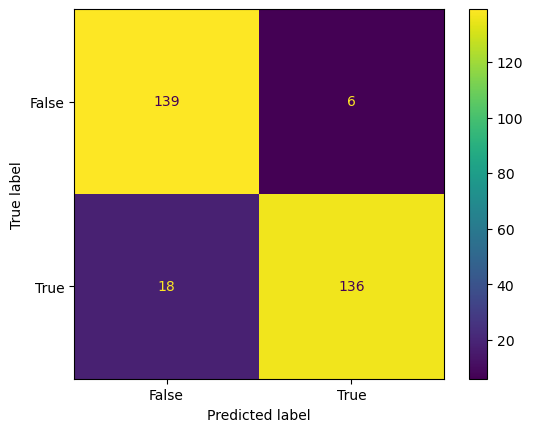

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       145
           1       0.96      0.88      0.92       154

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



In [15]:
#evaluvation
accuracy=accuracy_score(y_test,y_pred)
print("accuracy: ",round(accuracy,2))
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
plot=ConfusionMatrixDisplay(matrix,display_labels=[False,True])
plot.plot()
plt.show()
report=classification_report(y_test,y_pred)
print("Classification Report")
print(report)